# 1. IMPORT REQUIRED LIBRARIES
    1.1. Initialize matplotlib with magic code "notebook" to plot interactive graphs


In [11]:
%matplotlib notebook
import pandas as pd
import quandl,datetime
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, cross_validation,svm
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('ggplot')

# 2.Getting the dataset
    2.1. Download google Stock dataset from Quandl
    2.2. Creat a data frame of required features
    2.3. Print the head of data frame

In [7]:
df = quandl.get('WIKI/GOOGL')
df= df[['Adj. High','Adj. Low','Adj. Open','Adj. Close','Adj. Volume']]
df['HL. PCT']= ((df['Adj. High']-df['Adj. Low'])/df['Adj. Low'])*100
df['OC. PCT']= ((df['Adj. Open']-df['Adj. Close'])/df['Adj. Close'])*100
df= df[['Adj. Close','HL. PCT','OC. PCT','Adj. Volume']]
print(df.head()) #prints only head of data 



            Adj. Close   HL. PCT   OC. PCT  Adj. Volume
Date                                                   
2004-08-19   50.322842  8.441017 -0.323915   44659000.0
2004-08-20   54.322689  8.537313 -6.739913   22834300.0
2004-08-23   54.869377  4.062357  1.243144   18256100.0
2004-08-24   52.597363  7.753210  6.074187   15247300.0
2004-08-25   53.164113  3.966115 -1.169811    9188600.0


# 3.Creating Labels
    3.1.Create a label of "Adj. Close" for 32 days into the future and call it "forecast_col"
    3.2.Print the head of new data frame

In [12]:
forecast_col ='Adj. Close'
df.fillna(-99999,inplace=True) #to fill na blocks
forecast_out = int(math.ceil(0.01*len(df))) #used to shift lable col by 1%into future
df['label'] = df[forecast_col].shift(-forecast_out) #creates new col with forcasr_col shifted by 1% into  future
print(df.head()) #prints only head of data 

            Adj. Close   HL. PCT   OC. PCT  Adj. Volume      label
Date                                                              
2004-08-19   50.322842  8.441017 -0.323915   44659000.0  69.399229
2004-08-20   54.322689  8.537313 -6.739913   22834300.0  68.752232
2004-08-23   54.869377  4.062357  1.243144   18256100.0  69.639972
2004-08-24   52.597363  7.753210  6.074187   15247300.0  69.078238
2004-08-25   53.164113  3.966115 -1.169811    9188600.0  67.839414


# 4. Splitting of Data frame
## 4.1. Creating Feature,predict and lable Arrays
    4.1.1. "x" = array of all features except last 32 days
    4.1.2. "x_predict" = array of all features of last 32 days
    4.1.3. "y" = array of all labels

In [13]:
x= np.array(df.drop(['label'],1)) #making a feature array
x= preprocessing.scale(x)#scaling all the features
x= x[:-forecast_out]
x_predict= x[-forecast_out:]
df.dropna(inplace=True) #drops all rows with na in it 
y= np.array(df['label']) #makin a label array

## 4.2. Creating Train and Test Data

In [14]:
#splitting data into train and test 
x_train,x_test,y_train,y_test= cross_validation.train_test_split(x,y,test_size=0.2)

## 4.3. Creating a Classifier and Predicting
    4.3.1. Fit train Data with Linear Regression Classifier
    4.3.2. Find the Accuracy of classifier using test data 
    4.3.3. find the Stock Forecast by using "x_predict" in trained classifier
    4.3.4. Print Forecast Set, accuracy,Number days into future.

In [17]:
#using the linear regression classifier
clsf= LinearRegression()
clsf.fit(x_train,y_train)#fitting the data
accuracy=clsf.score(x_test,y_test)#checking the accuracy of trained data
forecast_set= clsf.predict(x_predict)
print("Accuracy of trained Classifier = ",accuracy)
print("Number of Days into the future = ",forecast_out)
print("Stock Forecast = ",forecast_set)

Accuracy of trained Classifier =  0.972621556744
Number of Days into the future =  32
Stock Forecast =  [ 787.59062477  790.07350814  793.81172326  798.4536653   783.82785777
  771.67356188  773.53163968  787.19238165  785.05999358  799.89457789
  804.13462925  818.26966976  817.08740224  823.91429927  826.64438158
  824.41817727  818.20157282  821.49098241  824.57181532  821.08844526
  819.15194256  817.37290768  818.98281304  813.52287905  812.25146321
  801.02738739  816.15315232  816.7718183   822.27340496  833.53650794
  836.1860246   835.27572511]


# 5.Visualizing the Forecast


             Adj. Close   HL. PCT   OC. PCT  Adj. Volume      label  forecast
Date                                                                        
2004-08-19   50.322842  8.441017 -0.323915   44659000.0  69.399229       NaN
2004-08-20   54.322689  8.537313 -6.739913   22834300.0  68.752232       NaN
2004-08-23   54.869377  4.062357  1.243144   18256100.0  69.639972       NaN
2004-08-24   52.597363  7.753210  6.074187   15247300.0  69.078238       NaN
2004-08-25   53.164113  3.966115 -1.169811    9188600.0  67.839414       NaN


<IPython.core.display.Javascript object>


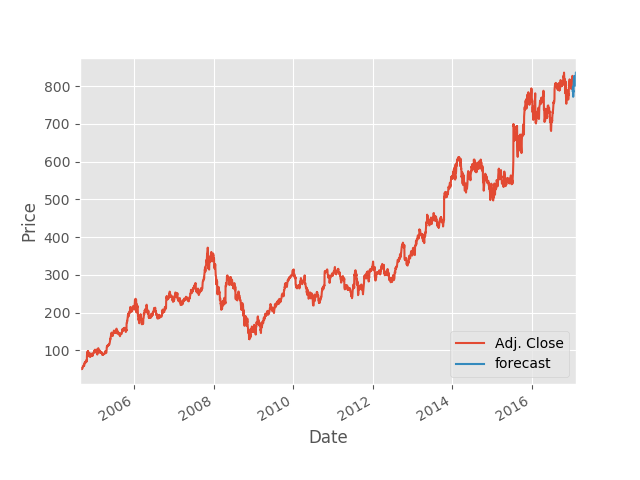

In [18]:
df['forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day= 86400
next_unix = last_unix + one_day
next_date =datetime.datetime.fromtimestamp(next_unix)

for i in forecast_set:
    next_date =datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
print("\n",df.head())
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()